In [10]:
# dirty hack to temporarily allow relative import
import os
import sys

PACKAGE_PARENT = '..'
SCRIPT_DIR = os.path.dirname(os.path.realpath(os.getcwd()))
print(SCRIPT_DIR)
sys.path.append(os.path.normpath(SCRIPT_DIR))
# sys.path.append(os.path.normpath(os.path.join(SCRIPT_DIR, PACKAGE_PARENT)))

/work/tianjunm/monaural-source-separation


In [11]:
import numpy as np
import torch
import torch.optim as optim
import torch.nn as nn
%load_ext autoreload
%autoreload 2

import librosa
import librosa.display
import matplotlib.pyplot as plt
import scipy.io.wavfile
from scipy.fftpack import dct
import scipy.signal
import IPython.display
import pandas as pd

import json
import datasets.setup
import models.setup
import loss_functions.setup

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Loading the dataset

In [42]:
dataset_config = 't0-2s-10c'
dataset_param = '4s-aaai'
model_name = 'STF'
model_param = 'sample'
experiment_id = '200420202512'

In [43]:
dataset_spec = f'/work/tianjunm/monaural-source-separation/experiments/hyperparameter/dataset/{dataset_config}/{dataset_param}.json'
model_spec = f'/work/tianjunm/monaural-source-separation/experiments/hyperparameter/model/{model_name}/{model_param}.json'
with open(dataset_spec) as df, open(model_spec) as mf:
    dataset_spec = json.load(df)
    model_spec = json.load(mf)

In [44]:
train_dataloader = datasets.setup.prepare_dataloader(dataset_spec, model_spec, 'train')

val_dataloader = datasets.setup.prepare_dataloader(dataset_spec, model_spec, 'val')

  0%|          | 0/98 [00:00<?, ? Computational Sequence Entries/s] 

<Success>: Computational sequence read from file /results/tianjunm/datasets/audioset_verified/csd_format/cut/16000/car.csd ...
<Status>: Checking the integrity of the data in <cut_16000_car> computational sequence ...
<Success>: <cut_16000_car> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_car> computational sequence ...
<Success>: <cut_16000_car> computational sequence metadata in correct format
<Success>: Computational sequence read from file /results/tianjunm/datasets/audioset_verified/csd_format/cut/16000/firetruck_siren.csd ...
<Status>: Checking the integrity of the data in <cut_16000_firetruck_siren> computational sequence ...
<Success>: <cut_16000_firetruck_siren> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_firetruck_siren> computational sequence ...
<Success>: <cut_16000_firetruck_siren> computational sequence metadata in correct format
<Success>: C

<Success>: <cut_16000_banjo> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_banjo> computational sequence ...
<Success>: <cut_16000_banjo> computational sequence metadata in correct format
<Success>: Computational sequence read from file /results/tianjunm/datasets/audioset_verified/csd_format/cut/16000/church_bell.csd ...
<Status>: Checking the integrity of the data in <cut_16000_church_bell> computational sequence ...
<Success>: <cut_16000_church_bell> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_church_bell> computational sequence ...
<Success>: <cut_16000_church_bell> computational sequence metadata in correct format
<Success>: Computational sequence read from file /results/tianjunm/datasets/audioset_verified/csd_format/cut/16000/flute.csd ...
<Status>: Checking the integrity of the data in <cut_16000_flute> computational sequence ...
<Success>: <cut_16000_

  0%|          | 0/100 [00:00<?, ? Computational Sequence Entries/s]

<Success>: Computational sequence read from file /results/tianjunm/datasets/audioset_verified/csd_format/cut/16000/electric_guitar.csd ...
<Status>: Checking the integrity of the data in <cut_16000_electric_guitar> computational sequence ...
<Success>: <cut_16000_electric_guitar> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_electric_guitar> computational sequence ...
<Success>: <cut_16000_electric_guitar> computational sequence metadata in correct format
<Success>: Computational sequence read from file /results/tianjunm/datasets/audioset_verified/csd_format/cut/16000/baby_laughter.csd ...
<Status>: Checking the integrity of the data in <cut_16000_baby_laughter> computational sequence ...
<Success>: <cut_16000_baby_laughter> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_baby_laughter> computational sequence ...
<Success>: <cut_16000_baby_laughter> computationa

  0%|          | 0/100 [00:00<?, ? Computational Sequence Entries/s]

<Success>: <cut_16000_male_speech> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_male_speech> computational sequence ...
<Success>: <cut_16000_male_speech> computational sequence metadata in correct format
<Success>: Computational sequence read from file /results/tianjunm/datasets/audioset_verified/csd_format/cut/16000/female_singing.csd ...
<Status>: Checking the integrity of the data in <cut_16000_female_singing> computational sequence ...
<Success>: <cut_16000_female_singing> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_female_singing> computational sequence ...
<Success>: <cut_16000_female_singing> computational sequence metadata in correct format
<Success>: Computational sequence read from file /results/tianjunm/datasets/audioset_verified/csd_format/cut/16000/chainsaw.csd ...
<Status>: Checking the integrity of the data in <cut_16000_chainsaw> computatio

<Success>: <cut_16000_male_singing> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_male_singing> computational sequence ...
<Success>: <cut_16000_male_singing> computational sequence metadata in correct format
<Success>: Computational sequence read from file /results/tianjunm/datasets/audioset_verified/csd_format/cut/16000/acoustic_guitar.csd ...
<Status>: Checking the integrity of the data in <cut_16000_acoustic_guitar> computational sequence ...
<Success>: <cut_16000_acoustic_guitar> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_acoustic_guitar> computational sequence ...
<Success>: <cut_16000_acoustic_guitar> computational sequence metadata in correct format
<Success>: Computational sequence read from file /results/tianjunm/datasets/audioset_verified/csd_format/cut/16000/bark.csd ...
<Status>: Checking the integrity of the data in <cut_16000_bark> computatio

<Success>: Computational sequence read from file /results/tianjunm/datasets/audioset_verified/csd_format/cut/16000/tambourine.csd ...
<Status>: Checking the integrity of the data in <cut_16000_tambourine> computational sequence ...
<Success>: <cut_16000_tambourine> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_tambourine> computational sequence ...
<Success>: <cut_16000_tambourine> computational sequence metadata in correct format
<Success>: Computational sequence read from file /results/tianjunm/datasets/audioset_verified/csd_format/cut/16000/violin.csd ...
<Status>: Checking the integrity of the data in <cut_16000_violin> computational sequence ...
<Success>: <cut_16000_violin> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_violin> computational sequence ...
<Success>: <cut_16000_violin> computational sequence metadata in correct format
<Success>: Computation

  0%|          | 0/99 [00:00<?, ? Computational Sequence Entries/s] 

<Success>: Computational sequence read from file /results/tianjunm/datasets/audioset_verified/csd_format/cut/16000/waterfall.csd ...
<Status>: Checking the integrity of the data in <cut_16000_waterfall> computational sequence ...
<Success>: <cut_16000_waterfall> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_waterfall> computational sequence ...
<Success>: <cut_16000_waterfall> computational sequence metadata in correct format
<Success>: Computational sequence read from file /results/tianjunm/datasets/audioset_verified/csd_format/cut/16000/saxophone.csd ...
<Status>: Checking the integrity of the data in <cut_16000_saxophone> computational sequence ...
<Success>: <cut_16000_saxophone> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_saxophone> computational sequence ...
<Success>: <cut_16000_saxophone> computational sequence metadata in correct format
<Success>: C

<Success>: <cut_16000_engine_idling> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_engine_idling> computational sequence ...
<Success>: <cut_16000_engine_idling> computational sequence metadata in correct format
<Success>: Computational sequence read from file /results/tianjunm/datasets/audioset_verified/csd_format/cut/16000/frying.csd ...
<Status>: Checking the integrity of the data in <cut_16000_frying> computational sequence ...
<Success>: <cut_16000_frying> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_frying> computational sequence ...
<Success>: <cut_16000_frying> computational sequence metadata in correct format
<Success>: Computational sequence read from file /results/tianjunm/datasets/audioset_verified/csd_format/cut/16000/fixedwing_aircraft_airplane.csd ...
<Status>: Checking the integrity of the data in <cut_16000_fixedwing_aircraft_airplane> comput

<Success>: Computational sequence read from file /results/tianjunm/datasets/audioset_verified/csd_format/cut/16000/engine.csd ...
<Status>: Checking the integrity of the data in <cut_16000_engine> computational sequence ...
<Success>: <cut_16000_engine> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_engine> computational sequence ...
<Success>: <cut_16000_engine> computational sequence metadata in correct format
<Success>: Computational sequence read from file /results/tianjunm/datasets/audioset_verified/csd_format/cut/16000/typing.csd ...
<Status>: Checking the integrity of the data in <cut_16000_typing> computational sequence ...
<Success>: <cut_16000_typing> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_typing> computational sequence ...
<Success>: <cut_16000_typing> computational sequence metadata in correct format


  0%|          | 0/96 [00:00<?, ? Computational Sequence Entries/s] 

<Success>: Computational sequence read from file /results/tianjunm/datasets/audioset_verified/csd_format/cut/16000/telephone_bell_ring.csd ...
<Status>: Checking the integrity of the data in <cut_16000_telephone_bell_ring> computational sequence ...
<Success>: <cut_16000_telephone_bell_ring> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_telephone_bell_ring> computational sequence ...
<Success>: <cut_16000_telephone_bell_ring> computational sequence metadata in correct format
<Success>: Computational sequence read from file /results/tianjunm/datasets/audioset_verified/csd_format/cut/16000/rain.csd ...
<Status>: Checking the integrity of the data in <cut_16000_rain> computational sequence ...
<Success>: <cut_16000_rain> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_rain> computational sequence ...
<Success>: <cut_16000_rain> computational sequence metadata in co

  0%|          | 0/100 [00:00<?, ? Computational Sequence Entries/s]

<Success>: <cut_16000_writing> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_writing> computational sequence ...
<Success>: <cut_16000_writing> computational sequence metadata in correct format
<Success>: Computational sequence read from file /results/tianjunm/datasets/audioset_verified/csd_format/cut/16000/knock.csd ...
<Status>: Checking the integrity of the data in <cut_16000_knock> computational sequence ...
<Success>: <cut_16000_knock> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_knock> computational sequence ...
<Success>: <cut_16000_knock> computational sequence metadata in correct format
<Success>: Computational sequence read from file /results/tianjunm/datasets/audioset_verified/csd_format/cut/16000/faucet.csd ...
<Status>: Checking the integrity of the data in <cut_16000_faucet> computational sequence ...
<Success>: <cut_16000_faucet> computational 

  0%|          | 0/100 [00:00<?, ? Computational Sequence Entries/s]

<Success>: <cut_16000_cowbell> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_cowbell> computational sequence ...
<Success>: <cut_16000_cowbell> computational sequence metadata in correct format
<Success>: Computational sequence read from file /results/tianjunm/datasets/audioset_verified/csd_format/cut/16000/shaver.csd ...
<Status>: Checking the integrity of the data in <cut_16000_shaver> computational sequence ...
<Success>: <cut_16000_shaver> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_shaver> computational sequence ...
<Success>: <cut_16000_shaver> computational sequence metadata in correct format
<Success>: Computational sequence read from file /results/tianjunm/datasets/audioset_verified/csd_format/cut/16000/water.csd ...
<Status>: Checking the integrity of the data in <cut_16000_water> computational sequence ...
<Success>: <cut_16000_water> computationa

  0%|          | 0/102 [00:00<?, ? Computational Sequence Entries/s]

<Success>: <cut_16000_child_speech> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_child_speech> computational sequence ...
<Success>: <cut_16000_child_speech> computational sequence metadata in correct format
<Success>: Dataset initialized successfully ... 
1e2289d18e4a2332cfe0092b73ee9d20f4a83d60cacfab30a3a0635e1677d86f54816ef87b02a1a84f2d77ce4e47aefc
<Success>: Computational sequence read from file /results/tianjunm/datasets/audioset_verified/csd_format/cut/16000/car.csd ...
<Status>: Checking the integrity of the data in <cut_16000_car> computational sequence ...
<Success>: <cut_16000_car> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_car> computational sequence ...
<Success>: <cut_16000_car> computational sequence metadata in correct format
<Success>: Computational sequence read from file /results/tianjunm/datasets/audioset_verified/csd_format/cut/16000/fi

<Success>: <cut_16000_flute> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_flute> computational sequence ...
<Success>: <cut_16000_flute> computational sequence metadata in correct format
<Success>: Computational sequence read from file /results/tianjunm/datasets/audioset_verified/csd_format/cut/16000/police_siren.csd ...
<Status>: Checking the integrity of the data in <cut_16000_police_siren> computational sequence ...
<Success>: <cut_16000_police_siren> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_police_siren> computational sequence ...
<Success>: <cut_16000_police_siren> computational sequence metadata in correct format
<Success>: Computational sequence read from file /results/tianjunm/datasets/audioset_verified/csd_format/cut/16000/electric_guitar.csd ...
<Status>: Checking the integrity of the data in <cut_16000_electric_guitar> computational sequence .

<Status>: Checking the integrity of the data in <cut_16000_male_speech> computational sequence ...
<Success>: <cut_16000_male_speech> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_male_speech> computational sequence ...
<Success>: <cut_16000_male_speech> computational sequence metadata in correct format
<Success>: Computational sequence read from file /results/tianjunm/datasets/audioset_verified/csd_format/cut/16000/female_singing.csd ...
<Status>: Checking the integrity of the data in <cut_16000_female_singing> computational sequence ...
<Success>: <cut_16000_female_singing> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_female_singing> computational sequence ...
<Success>: <cut_16000_female_singing> computational sequence metadata in correct format
<Success>: Computational sequence read from file /results/tianjunm/datasets/audioset_verified/csd_format/cut/160

  0%|          | 0/101 [00:00<?, ? Computational Sequence Entries/s]

<Success>: Computational sequence read from file /results/tianjunm/datasets/audioset_verified/csd_format/cut/16000/acoustic_guitar.csd ...
<Status>: Checking the integrity of the data in <cut_16000_acoustic_guitar> computational sequence ...
<Success>: <cut_16000_acoustic_guitar> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_acoustic_guitar> computational sequence ...
<Success>: <cut_16000_acoustic_guitar> computational sequence metadata in correct format
<Success>: Computational sequence read from file /results/tianjunm/datasets/audioset_verified/csd_format/cut/16000/bark.csd ...
<Status>: Checking the integrity of the data in <cut_16000_bark> computational sequence ...
<Success>: <cut_16000_bark> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_bark> computational sequence ...
<Success>: <cut_16000_bark> computational sequence metadata in correct format
<Succes

  0%|          | 0/99 [00:00<?, ? Computational Sequence Entries/s] 

<Success>: <cut_16000_violin> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_violin> computational sequence ...
<Success>: <cut_16000_violin> computational sequence metadata in correct format
<Success>: Computational sequence read from file /results/tianjunm/datasets/audioset_verified/csd_format/cut/16000/fireworks.csd ...
<Status>: Checking the integrity of the data in <cut_16000_fireworks> computational sequence ...
<Success>: <cut_16000_fireworks> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_fireworks> computational sequence ...
<Success>: <cut_16000_fireworks> computational sequence metadata in correct format
<Success>: Computational sequence read from file /results/tianjunm/datasets/audioset_verified/csd_format/cut/16000/motorboat.csd ...
<Status>: Checking the integrity of the data in <cut_16000_motorboat> computational sequence ...
<Success>: <cut_16000

  0%|          | 0/98 [00:00<?, ? Computational Sequence Entries/s] 

<Success>: <cut_16000_saxophone> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_saxophone> computational sequence ...
<Success>: <cut_16000_saxophone> computational sequence metadata in correct format
<Success>: Computational sequence read from file /results/tianjunm/datasets/audioset_verified/csd_format/cut/16000/bird.csd ...
<Status>: Checking the integrity of the data in <cut_16000_bird> computational sequence ...
<Success>: <cut_16000_bird> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_bird> computational sequence ...
<Success>: <cut_16000_bird> computational sequence metadata in correct format
<Success>: Computational sequence read from file /results/tianjunm/datasets/audioset_verified/csd_format/cut/16000/ukulele.csd ...
<Status>: Checking the integrity of the data in <cut_16000_ukulele> computational sequence ...
<Success>: <cut_16000_ukulele> computatio

  0%|          | 0/99 [00:00<?, ? Computational Sequence Entries/s] 

<Success>: <cut_16000_fixedwing_aircraft_airplane> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_fixedwing_aircraft_airplane> computational sequence ...
<Success>: <cut_16000_fixedwing_aircraft_airplane> computational sequence metadata in correct format
<Success>: Computational sequence read from file /results/tianjunm/datasets/audioset_verified/csd_format/cut/16000/engine.csd ...
<Status>: Checking the integrity of the data in <cut_16000_engine> computational sequence ...
<Success>: <cut_16000_engine> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_engine> computational sequence ...
<Success>: <cut_16000_engine> computational sequence metadata in correct format
<Success>: Computational sequence read from file /results/tianjunm/datasets/audioset_verified/csd_format/cut/16000/typing.csd ...
<Status>: Checking the integrity of the data in <cut_16000_typing> comput

<Success>: <cut_16000_telephone_bell_ring> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_telephone_bell_ring> computational sequence ...
<Success>: <cut_16000_telephone_bell_ring> computational sequence metadata in correct format
<Success>: Computational sequence read from file /results/tianjunm/datasets/audioset_verified/csd_format/cut/16000/rain.csd ...
<Status>: Checking the integrity of the data in <cut_16000_rain> computational sequence ...
<Success>: <cut_16000_rain> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_rain> computational sequence ...
<Success>: <cut_16000_rain> computational sequence metadata in correct format
<Success>: Computational sequence read from file /results/tianjunm/datasets/audioset_verified/csd_format/cut/16000/applause.csd ...
<Status>: Checking the integrity of the data in <cut_16000_applause> computational sequence ...
<Success>

  0%|          | 0/98 [00:00<?, ? Computational Sequence Entries/s] 

<Success>: Computational sequence read from file /results/tianjunm/datasets/audioset_verified/csd_format/cut/16000/knock.csd ...
<Status>: Checking the integrity of the data in <cut_16000_knock> computational sequence ...
<Success>: <cut_16000_knock> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_knock> computational sequence ...
<Success>: <cut_16000_knock> computational sequence metadata in correct format
<Success>: Computational sequence read from file /results/tianjunm/datasets/audioset_verified/csd_format/cut/16000/faucet.csd ...
<Status>: Checking the integrity of the data in <cut_16000_faucet> computational sequence ...
<Success>: <cut_16000_faucet> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_faucet> computational sequence ...
<Success>: <cut_16000_faucet> computational sequence metadata in correct format
<Success>: Computational sequence read from fil

<Success>: <cut_16000_water> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_water> computational sequence ...
<Success>: <cut_16000_water> computational sequence metadata in correct format
<Success>: Computational sequence read from file /results/tianjunm/datasets/audioset_verified/csd_format/cut/16000/raindrop.csd ...
<Status>: Checking the integrity of the data in <cut_16000_raindrop> computational sequence ...
<Success>: <cut_16000_raindrop> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_raindrop> computational sequence ...
<Success>: <cut_16000_raindrop> computational sequence metadata in correct format
<Success>: Computational sequence read from file /results/tianjunm/datasets/audioset_verified/csd_format/cut/16000/wind.csd ...
<Status>: Checking the integrity of the data in <cut_16000_wind> computational sequence ...
<Success>: <cut_16000_wind> computation

In [45]:
model = models.setup.prepare_model(dataset_spec, model_spec, train_dataloader.dataset.input_shape)

encoder only


In [46]:
loss_fn = loss_functions.setup.prepare_loss_fn(dataset_spec, model_spec)
# loss_fn = loss_functions.loss_implementation.NoMask(dataset_spec['config'])

In [47]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


In [92]:
for i, batch in enumerate(val_dataloader):
    model_input = batch['model_input']
    ground_truths = batch['ground_truths']
    components = batch['component_info']
    break

print(i)

print(model_input.shape)
print(ground_truths.shape)

0
torch.Size([32, 334, 258])
torch.Size([32, 335, 516])


In [19]:
def display(spect, sample_rate, y_axis='mel',x_axis='time'):
    db_data = librosa.power_to_db(np.abs(spect)**2, ref=np.max)
    librosa.display.specshow(db_data, sr=sample_rate, y_axis=y_axis, x_axis=x_axis)


def create_composite(tensor):
    real = tensor[0].numpy().T
    imag = tensor[1].numpy().T
    composite = real + 1j * imag
    return composite


def visualize_input(tensor, dataset_spec, feature):
    composite = create_composite(tensor)
    if feature == 'spectrogram':
        fig = plt.figure(figsize=(3, 1))
        plt.subplot(1, 1, 1)
        display(composite, sample_rate=dataset_spec['config']['sample_rate'])
    
    elif feature == 'pcm':
        pcm = scipy.signal.istft(composite, nperseg=256, noverlap=64)
        return pcm
        

def visualize_output(tensors, dataset_spec, feature, class_names=None):
    c = tensors.size(0)
    composites = []

    for src in range(c):
        composites.append(create_composite(tensors[src]))

    if feature == 'spectrogram':
        for src, composite in enumerate(composites):
            fig = plt.figure(figsize=(3, c))
            plt.subplot(c, 1, src + 1)
            plt.title(class_names[src])
            display(composite, sample_rate=dataset_spec['config']['sample_rate'])
        
    elif feature == 'pcm':
        pcms = []
        for composite in composites:
            pcms.append(scipy.signal.istft(composite, nperseg=256, noverlap=64))
        return pcms


In [93]:
batch_idx = 2
sample_input = model_input[batch_idx]
sample_gt = ground_truths[batch_idx]
sample_components = [samples[batch_idx] for samples in components]

if dataset_param.endswith('aaai'):
    n = sample_input.size(0)
    s = dataset_spec['config']['num_sources']
    sample_input = sample_input.reshape(n, 2, -1).permute(1, 0, 2)
    sample_gt = sample_gt.view(n, s, 2, -1).permute(1, 2, 0, 3)
#     sample_input = sample_input.view(n, 2, -1).permute(1, 0, 2)
#     sample_gt = sample_gt.view(n, s, 2, -1).permute(1, 2, 0, 3)

RuntimeError: shape '[334, 2, 2, -1]' is invalid for input of size 172860

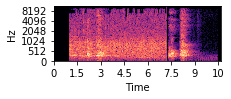

In [94]:
visualize_input(sample_input.cpu(), dataset_spec, 'spectrogram')

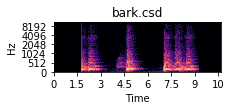

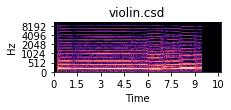

In [93]:
visualize_output(sample_gt, dataset_spec, 'spectrogram', class_names=sample_components)

In [96]:
input_pcm = visualize_input(sample_input, dataset_spec, 'pcm')
# gt_pcms = visualize_output(sample_gt, dataset_spec, 'pcm')

In [97]:
IPython.display.Audio(data=input_pcm, rate=dataset_spec['config']['sample_rate'])

In [96]:
IPython.display.Audio(data=gt_pcms[0], rate=dataset_spec['config']['sample_rate'])

In [97]:
IPython.display.Audio(data=gt_pcms[1], rate=dataset_spec['config']['sample_rate'])

In [74]:
IPython.display.Audio(data=gt_pcms[2], rate=dataset_spec['config']['sample_rate'])

In [55]:
IPython.display.Audio(data=gt_pcms[3], rate=dataset_spec['config']['sample_rate'])

visualize sample data

In [51]:
snapshot = torch.load(f'/results/tianjunm/monaural-source-separation/experiments/snapshots/{model_name}-{model_param}-wild-mix-{dataset_config}-4s-aaai/{experiment_id}/best.tar')

In [52]:
snapshot['loss']

4794.381452287947

In [53]:
s = 2
b = model_input.size(0)
n = model_input.size(1)
m = model_input.size(2)

def decoder(model, model_input, s, m):
    b = model_input.size(0)

    ys = torch.ones(b, 1, s * m).to(model_input.device)
    
    src = model_input.unsqueeze(2)
    for i in range(n):
        out = model(model_input, ys) * src[:, :i + 1]
        ys = torch.cat((ys, out.view(b, i + 1, -1)[:, -1].unsqueeze(1).data), dim=1)
    
    return ys

In [54]:
model.load_state_dict(snapshot['model_state_dict'])

<All keys matched successfully>

In [55]:
model = model.to(device)
model_input = model_input.to(device)
ground_truths = ground_truths.to(device)

In [56]:
model_output = model(model_input, ground_truths)

In [57]:
model_input.size()

torch.Size([32, 334, 258])

In [17]:
running_loss = 0.0
iters = 0
for i, batch in enumerate(val_dataloader):
    model_input = batch['model_input'].to(device)
    ground_truths = batch['ground_truths'].to(device)
#     prediction = decoder(model, model_input, s, m)
    model_output = model(model_input, ground_truths)
    
    loss = loss_fn(model_input, model_output, ground_truths[:, 1:])
    print(loss)
    running_loss += loss.item()
    iters += 1
    
running_loss / iters 

tensor(7969.8047, grad_fn=<MeanBackward0>)
tensor(5658.4473, grad_fn=<MeanBackward0>)
tensor(6011.9751, grad_fn=<MeanBackward0>)
tensor(4684.6934, grad_fn=<MeanBackward0>)
tensor(6075.7964, grad_fn=<MeanBackward0>)
tensor(4234.3218, grad_fn=<MeanBackward0>)
tensor(4977.8682, grad_fn=<MeanBackward0>)
tensor(5072.4922, grad_fn=<MeanBackward0>)
tensor(6727.5396, grad_fn=<MeanBackward0>)
tensor(6878.8413, grad_fn=<MeanBackward0>)
tensor(6547.2139, grad_fn=<MeanBackward0>)
tensor(7915.7349, grad_fn=<MeanBackward0>)
tensor(6619.5859, grad_fn=<MeanBackward0>)
tensor(6609.5234, grad_fn=<MeanBackward0>)
tensor(6079.7876, grad_fn=<MeanBackward0>)
tensor(5801.7393, grad_fn=<MeanBackward0>)
tensor(3541.3584, grad_fn=<MeanBackward0>)
tensor(5079.2041, grad_fn=<MeanBackward0>)
tensor(6701.9790, grad_fn=<MeanBackward0>)
tensor(3806.9922, grad_fn=<MeanBackward0>)
tensor(3790.6804, grad_fn=<MeanBackward0>)
tensor(7049.6460, grad_fn=<MeanBackward0>)
tensor(5467.4863, grad_fn=<MeanBackward0>)
tensor(6081

KeyboardInterrupt: 

In [14]:
model = model.to(device)

In [69]:
# for i, batch in enumerate(val_dataloader):
#     model_input = batch['model_input'].to(self.device)
#     ground_truths = batch['ground_truths'].to(self.device)

#     model_output = model(model_input, ground_truths)
#     loss = loss_fn(model_input, model_output, ground_truths[:, 1:])

#     running_loss += loss.item()
#     iters += 1
# prediction = decoder(model, model_input.to(device), s, m)
prediction = model(model_input.to(device), ground_truths.to(device)) * model_input.to(device).unsqueeze(2)

In [81]:
prediction = prediction.view(b, n, s, 2, -1).permute(0, 2, 3, 1, 4)

In [39]:
decoded.size()

torch.Size([16, 335, 516])

In [40]:
model_output = decoded[:, 1:].view(b, n, s, 2, -1).permute(0, 2, 3, 1, 4)

In [58]:
model_output.size()

torch.Size([32, 334, 2, 258])

In [59]:
if dataset_param.endswith('aaai'):
    model_input = model_input.view(b, n, 2, -1).permute(0, 2, 1, 3)
    model_output = model_output.view(b, n, s, 2, -1).permute(0, 2, 3, 1, 4)


M_r, M_i = model_output[:, :, 0], model_output[:, :, 1]
Y_r = model_input[:, 0].unsqueeze(1)
Y_i = model_input[:, 1].unsqueeze(1)

S_r = M_r * Y_r - M_i * Y_i
S_i = M_r * Y_i + M_i * Y_r
# S_r = M_r * Y_r
# S_i = M_i * Y_i

predicted = torch.stack([S_r, S_i], dim=2)
# predicted = torch.stack([M_r, M_i], dim=2)

In [82]:
batch_idx = 2

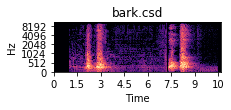

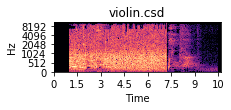

In [83]:
visualize_output(predicted[batch_idx].cpu().detach(), dataset_spec, 'spectrogram', class_names=sample_components)

In [66]:
visualize_output(prediction[batch_idx].cpu().detach(), dataset_spec, 'spectrogram', class_names=sample_components)

NameError: name 'prediction' is not defined

In [84]:
predicted_pcms = visualize_output(predicted[batch_idx].cpu().detach(), dataset_spec, 'pcm')

In [85]:
IPython.display.Audio(data=predicted_pcms[0], rate=dataset_spec['config']['sample_rate'])

In [86]:
IPython.display.Audio(data=predicted_pcms[1], rate=dataset_spec['config']['sample_rate'])

In [94]:
IPython.display.Audio(data=predicted_pcms[0], rate=dataset_spec['config']['sample_rate'])

In [96]:
IPython.display.Audio(data=predicted_pcms[1], rate=dataset_spec['config']['sample_rate'])

In [52]:
IPython.display.Audio(data=predicted_pcms[4], rate=dataset_spec['config']['sample_rate'])

In [17]:
def subsequent_mask(size):
    "Mask out subsequent positions."
    attn_shape = (1, size, size)
    subsequent_mask = np.triu(np.ones(attn_shape), k=1).astype('uint8')
    return torch.from_numpy(subsequent_mask) == 0

def greedy_decoder(model, src, seq_len, num_sources, input_dim, device):
    nbatch = src.shape[0]
    ntoken = 1
    ys = torch.ones(nbatch, ntoken, num_sources * input_dim).fill_(1.).type_as(src.data).to(device)

    subseq_mask = subsequent_mask(seq_len + 1).type_as(src.data).to(device)
    
    for i in range(seq_len):
        out_mask = model(src, ys).view(b, i + 1, s, 2, -1).permute(0, 2, 3, 1, 4)
        
#         noisy = src.data.reshape(b, n, 2, -1).permute(0, 2, 1, 3)

        S_r = out_mask[:, :, 0] * src.data.reshape(b, n, 2, -1).permute(0, 2, 1, 3)[:, 0, :i + 1].unsqueeze(1) - out_mask[:, :, 1] * src.data.reshape(b, n, 2, -1).permute(0, 2, 1, 3)[:, 1, :i + 1].unsqueeze(1)
        S_i = out_mask[:, :, 0] * src.data.reshape(b, n, 2, -1).permute(0, 2, 1, 3)[:, 1, :i + 1].unsqueeze(1) + out_mask[:, :, 1] * src.data.reshape(b, n, 2, -1).permute(0, 2, 1, 3)[:, 0, :i + 1].unsqueeze(1)
        
        out = torch.stack([S_r, S_i], dim=2).permute(0, 3, 1, 2, 4).reshape(nbatch, i + 1, -1)

        ys = torch.cat([ys, out[:, i].unsqueeze(1)], dim=1)
    return ys[:, 1:]


